In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
# !pip install seaborn

In [3]:
input_df = pd.read_excel("input_data1.xlsx")

In [4]:
input_df.columns

Index(['week_date', 'CDC+DIGITAL', 'CDC+TV', 'EQUITY+DIGITAL',
       'EQUITY+IN STORE', 'EQUITY+OOH',
       'EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO', 'EQUITY+TV',
       'PANJAVED+DIGITAL', 'PANJAVED+IN STORE', 'PANJAVED+OOH', 'PANJAVED+TV',
       'SALT+DIGITAL', 'SALT+IN STORE',
       'SALT+OTHERADVERTISING_NEWSPAPER_RADIO', 'SALT+TV', 'TOTAL+DIGITAL',
       'TOTAL+IN STORE', 'TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO', 'TOTAL+TV',
       'YearMonth', 'value', 'weeks_in_month', 'weekly_revenue', 'extravol',
       'wd', 'bigpack', 'tourist_arrivals_in_million', 'free_with_others',
       'week5_si', 'top_of_mind_brand_awareness', 'welfare_additional_boost',
       'buyget', 'pmd', 'free_with_others_darlie', 'loyalty', 'welfare',
       'panic_pantry_loading', 'closeness_top_3_box', 'near_pack', 'rl',
       'target_discount', 'darlie_discount', 'total_unaided_brand_awareness',
       'theme', 'freepremium', 'trendline', 'week13_si', 'target_price', 'tpr',
       'darlie_cdc_basepri

In [5]:
# media variables
media_vars = ['CDC+DIGITAL', 'CDC+TV', 'EQUITY+DIGITAL',
       'EQUITY+IN STORE', 'EQUITY+OOH',
       'EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO', 'EQUITY+TV',
       'PANJAVED+DIGITAL', 'PANJAVED+IN STORE', 'PANJAVED+OOH', 'PANJAVED+TV',
       'SALT+DIGITAL', 'SALT+IN STORE',
       'SALT+OTHERADVERTISING_NEWSPAPER_RADIO', 'SALT+TV', 'TOTAL+DIGITAL',
       'TOTAL+IN STORE', 'TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO', 'TOTAL+TV']

In [6]:
# sorted(list(set(input_df.columns)-set(media_variables)))

In [7]:
#data_cols = ['week_date','YearMonth', 'weeks_in_month']
# store week_date in data_cols
data_cols = ['week_date']

In [8]:
# control variables
control_vars = ['aided_awareness',
 'bigpack',
 'buyget',
 'chim_shop_chai',
 'closeness_top_3_box',
 'consumer_confidence_index',
 'darlie_cdc_basepriceratio',
 'darlie_discount',
 'extravol',
 'extravol_darlie',
 'free_promo',
 'free_promo_darlie',
 'free_with_others',
 'free_with_others_darlie',
 'freepremium',
 'loyalty',
 'nd',
 'near_pack',
 'panic_pantry_loading',
 'pmd',
 'rl',
 'target_baseprice',
 'target_discount',
 'target_price',
 'theme',
 'top_of_mind_brand_awareness',
 'total_unaided_brand_awareness',
 'tourist_arrivals_in_million',
 'tpr',
 'tpr_darlie',
 'trendline',
 'wd',
 'week13_si',
 'week5_si',
 'welfare',
 'welfare_additional_boost']

In [9]:
#rev_cols = ['value','weekly_revenue']
# store weekly_revenue in rev_cols
rev_cols = ['weekly_revenue']

In [10]:
# add all columns
req_cols = data_cols + media_vars + control_vars + rev_cols

In [11]:
print(req_cols)

['week_date', 'CDC+DIGITAL', 'CDC+TV', 'EQUITY+DIGITAL', 'EQUITY+IN STORE', 'EQUITY+OOH', 'EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO', 'EQUITY+TV', 'PANJAVED+DIGITAL', 'PANJAVED+IN STORE', 'PANJAVED+OOH', 'PANJAVED+TV', 'SALT+DIGITAL', 'SALT+IN STORE', 'SALT+OTHERADVERTISING_NEWSPAPER_RADIO', 'SALT+TV', 'TOTAL+DIGITAL', 'TOTAL+IN STORE', 'TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO', 'TOTAL+TV', 'aided_awareness', 'bigpack', 'buyget', 'chim_shop_chai', 'closeness_top_3_box', 'consumer_confidence_index', 'darlie_cdc_basepriceratio', 'darlie_discount', 'extravol', 'extravol_darlie', 'free_promo', 'free_promo_darlie', 'free_with_others', 'free_with_others_darlie', 'freepremium', 'loyalty', 'nd', 'near_pack', 'panic_pantry_loading', 'pmd', 'rl', 'target_baseprice', 'target_discount', 'target_price', 'theme', 'top_of_mind_brand_awareness', 'total_unaided_brand_awareness', 'tourist_arrivals_in_million', 'tpr', 'tpr_darlie', 'trendline', 'wd', 'week13_si', 'week5_si', 'welfare', 'welfare_additional_

In [12]:
# keep only req_cols in input_df
input_df = input_df[req_cols]

In [13]:
input_df

,week_date,CDC+DIGITAL,CDC+TV,EQUITY+DIGITAL,EQUITY+IN STORE,EQUITY+OOH,EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO,EQUITY+TV,PANJAVED+DIGITAL,PANJAVED+IN STORE,...,tourist_arrivals_in_million,tpr,tpr_darlie,trendline,wd,week13_si,week5_si,welfare,welfare_additional_boost,weekly_revenue
0,2017-02-03,0.0,1318312.5,1.023217e+05,0,0.0,0,0.0,0.000000,0.0,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
1,2017-02-10,0.0,1318312.5,1.023217e+05,0,0.0,0,0.0,0.000000,0.0,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
2,2017-02-17,0.0,1318312.5,1.023217e+05,0,0.0,0,0.0,0.000000,0.0,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
3,2017-02-24,0.0,1318312.5,1.023217e+05,0,0.0,0,0.0,0.000000,0.0,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
4,2017-03-03,0.0,1066450.0,2.815029e+05,0,0.0,0,266200.0,0.000000,0.0,...,9.195,0.123373,0.199166,-21.5,54.985101,-0.009762,0.242712,0.0,0.0,20678680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2020-11-27,0.0,0.0,1.106151e+06,0,0.0,422400,2437000.0,625098.632734,0.0,...,0.011,0.034785,0.005271,22.5,47.024603,-0.048573,-0.044766,0.0,0.0,22205975.0
200,2020-12-04,0.0,0.0,4.001368e+05,0,0.0,0,1620562.5,724498.561816,0.0,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0
201,2020-12-11,0.0,0.0,4.001368e+05,0,0.0,0,1620562.5,724498.561816,0.0,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0
202,2020-12-18,0.0,0.0,4.001368e+05,0,0.0,0,1620562.5,724498.561816,0.0,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0


In [14]:
input_df.columns

Index(['week_date', 'CDC+DIGITAL', 'CDC+TV', 'EQUITY+DIGITAL',
       'EQUITY+IN STORE', 'EQUITY+OOH',
       'EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO', 'EQUITY+TV',
       'PANJAVED+DIGITAL', 'PANJAVED+IN STORE', 'PANJAVED+OOH', 'PANJAVED+TV',
       'SALT+DIGITAL', 'SALT+IN STORE',
       'SALT+OTHERADVERTISING_NEWSPAPER_RADIO', 'SALT+TV', 'TOTAL+DIGITAL',
       'TOTAL+IN STORE', 'TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO', 'TOTAL+TV',
       'aided_awareness', 'bigpack', 'buyget', 'chim_shop_chai',
       'closeness_top_3_box', 'consumer_confidence_index',
       'darlie_cdc_basepriceratio', 'darlie_discount', 'extravol',
       'extravol_darlie', 'free_promo', 'free_promo_darlie',
       'free_with_others', 'free_with_others_darlie', 'freepremium', 'loyalty',
       'nd', 'near_pack', 'panic_pantry_loading', 'pmd', 'rl',
       'target_baseprice', 'target_discount', 'target_price', 'theme',
       'top_of_mind_brand_awareness', 'total_unaided_brand_awareness',
       'tourist_arrival

## LR without Adstocking & Saturation

In [ ]:
# we do not give date and revenue in training the model
X = input_df.drop(columns = ['week_date','weekly_revenue'])

In [19]:
y = input_df['weekly_revenue']

In [20]:
X

,CDC+DIGITAL,CDC+TV,EQUITY+DIGITAL,EQUITY+IN STORE,EQUITY+OOH,EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO,EQUITY+TV,PANJAVED+DIGITAL,PANJAVED+IN STORE,PANJAVED+OOH,...,total_unaided_brand_awareness,tourist_arrivals_in_million,tpr,tpr_darlie,trendline,wd,week13_si,week5_si,welfare,welfare_additional_boost
0,0.0,1318312.5,1.023217e+05,0,0.0,0,0.0,0.000000,0.0,0.0,...,0.00,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0
1,0.0,1318312.5,1.023217e+05,0,0.0,0,0.0,0.000000,0.0,0.0,...,0.00,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0
2,0.0,1318312.5,1.023217e+05,0,0.0,0,0.0,0.000000,0.0,0.0,...,0.00,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0
3,0.0,1318312.5,1.023217e+05,0,0.0,0,0.0,0.000000,0.0,0.0,...,0.00,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0
4,0.0,1066450.0,2.815029e+05,0,0.0,0,266200.0,0.000000,0.0,0.0,...,0.47,9.195,0.123373,0.199166,-21.5,54.985101,-0.009762,0.242712,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.0,0.0,1.106151e+06,0,0.0,422400,2437000.0,625098.632734,0.0,0.0,...,0.46,0.011,0.034785,0.005271,22.5,47.024603,-0.048573,-0.044766,0.0,0.0
200,0.0,0.0,4.001368e+05,0,0.0,0,1620562.5,724498.561816,0.0,555388.5,...,0.38,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0
201,0.0,0.0,4.001368e+05,0,0.0,0,1620562.5,724498.561816,0.0,555388.5,...,0.38,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0
202,0.0,0.0,4.001368e+05,0,0.0,0,1620562.5,724498.561816,0.0,555388.5,...,0.38,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0


In [21]:
y

0      24818075.0
1      24818075.0
2      24818075.0
3      24818075.0
4      20678680.0
          ...    
199    22205975.0
200    22505400.0
201    22505400.0
202    22505400.0
203    22505400.0
Name: weekly_revenue, Length: 204, dtype: float64

In [ ]:
# splitting 20% data for testing and 80% for training of the model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
X.shape

(204, 55)

In [ ]:
# 80% rows 
X_train.shape

(163, 55)

In [ ]:
# 20% rows 
X_test.shape

(41, 55)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("MAPE:", mape)

Mean Squared Error: 94047588949.72421
R² Score: 0.9880310833458478
MAPE: 0.36325814261484035


In [28]:
model1 = LinearRegression()
model1.fit(X, y)

LinearRegression()

In [29]:
# Predictions
y_pred = model1.predict(X)

# Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("MAPE:", mape)

Mean Squared Error: 2.5625609252349803e-09
R² Score: 1.0
MAPE: 1.3582356661152988e-10


In [30]:
X.columns

Index(['CDC+DIGITAL', 'CDC+TV', 'EQUITY+DIGITAL', 'EQUITY+IN STORE',
       'EQUITY+OOH', 'EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO', 'EQUITY+TV',
       'PANJAVED+DIGITAL', 'PANJAVED+IN STORE', 'PANJAVED+OOH', 'PANJAVED+TV',
       'SALT+DIGITAL', 'SALT+IN STORE',
       'SALT+OTHERADVERTISING_NEWSPAPER_RADIO', 'SALT+TV', 'TOTAL+DIGITAL',
       'TOTAL+IN STORE', 'TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO', 'TOTAL+TV',
       'aided_awareness', 'bigpack', 'buyget', 'chim_shop_chai',
       'closeness_top_3_box', 'consumer_confidence_index',
       'darlie_cdc_basepriceratio', 'darlie_discount', 'extravol',
       'extravol_darlie', 'free_promo', 'free_promo_darlie',
       'free_with_others', 'free_with_others_darlie', 'freepremium', 'loyalty',
       'nd', 'near_pack', 'panic_pantry_loading', 'pmd', 'rl',
       'target_baseprice', 'target_discount', 'target_price', 'theme',
       'top_of_mind_brand_awareness', 'total_unaided_brand_awareness',
       'tourist_arrivals_in_million', 'tpr'

In [ ]:
# media_vars
# control_vars1 = list(set(X.columns)-set(media_vars))

# X is my input df to model y is target
# i want to keep columns in list media_vars to be positive or 0 and rest coolumn in list control_vars1 can be neagtive 0 or positive

SyntaxError: invalid syntax (4045893987.py, line 4)

In [31]:
model1.coef_

array([ 3.56157284e+01, -6.96655792e+00,  2.79351946e+00, -2.16325708e+02,
        2.79698907e+00, -8.86064894e+01, -2.73004928e+00, -9.91684530e+00,
       -1.84240810e+01,  1.08772077e+00,  1.09336191e+01, -3.89102807e+01,
        4.75025297e+01, -6.29044490e+01,  6.92288081e+00, -9.78192160e+00,
        1.62048103e+01, -4.45891282e+01,  6.01703676e+00,  1.53537635e+07,
        8.46299437e+07, -9.70335024e+07, -1.59984792e+08, -1.09093736e+07,
       -7.62558719e+05,  5.39835454e+07,  1.42145643e+06, -9.33189432e+07,
        2.21491872e+07,  2.64548608e+07,  2.39880751e+07, -1.18913771e+07,
        7.12323121e+06, -1.21019238e+08, -7.37839752e+07,  5.91856253e+05,
        1.83335276e+08, -1.06473825e+07, -7.48646447e+07, -9.93426258e+07,
       -3.81993415e+05,  1.90072874e+06, -7.10544857e+05, -4.19506831e+05,
       -9.45458546e+07,  9.92015145e+07, -1.52856817e+06,  2.21752881e+07,
       -9.20678478e+07, -7.76458195e+05, -2.85937228e+04,  3.35871048e+07,
       -1.24457649e+07,  

In [32]:
# map coeff to respective columns
coeff_mapping = dict(zip(X.columns, model1.coef_))

In [33]:
coeff_mapping

{'CDC+DIGITAL': np.float64(35.61572844597996),
 'CDC+TV': np.float64(-6.96655792051185),
 'EQUITY+DIGITAL': np.float64(2.7935194611207956),
 'EQUITY+IN STORE': np.float64(-216.32570848725726),
 'EQUITY+OOH': np.float64(2.7969890733142435),
 'EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO': np.float64(-88.60648936057491),
 'EQUITY+TV': np.float64(-2.7300492781597114),
 'PANJAVED+DIGITAL': np.float64(-9.916845304446),
 'PANJAVED+IN STORE': np.float64(-18.424081032637673),
 'PANJAVED+OOH': np.float64(1.0877207682343055),
 'PANJAVED+TV': np.float64(10.933619119353096),
 'SALT+DIGITAL': np.float64(-38.91028071516922),
 'SALT+IN STORE': np.float64(47.50252967514163),
 'SALT+OTHERADVERTISING_NEWSPAPER_RADIO': np.float64(-62.904448983314154),
 'SALT+TV': np.float64(6.922880806692831),
 'TOTAL+DIGITAL': np.float64(-9.78192159869996),
 'TOTAL+IN STORE': np.float64(16.204810314785504),
 'TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO': np.float64(-44.5891282050666),
 'TOTAL+TV': np.float64(6.017036757600749),
 

In [34]:
list(input_df['week_date'].unique())

[Timestamp('2017-02-03 00:00:00'),
 Timestamp('2017-02-10 00:00:00'),
 Timestamp('2017-02-17 00:00:00'),
 Timestamp('2017-02-24 00:00:00'),
 Timestamp('2017-03-03 00:00:00'),
 Timestamp('2017-03-10 00:00:00'),
 Timestamp('2017-03-17 00:00:00'),
 Timestamp('2017-03-24 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2017-04-07 00:00:00'),
 Timestamp('2017-04-14 00:00:00'),
 Timestamp('2017-04-21 00:00:00'),
 Timestamp('2017-04-28 00:00:00'),
 Timestamp('2017-05-05 00:00:00'),
 Timestamp('2017-05-12 00:00:00'),
 Timestamp('2017-05-19 00:00:00'),
 Timestamp('2017-05-26 00:00:00'),
 Timestamp('2017-06-02 00:00:00'),
 Timestamp('2017-06-09 00:00:00'),
 Timestamp('2017-06-16 00:00:00'),
 Timestamp('2017-06-23 00:00:00'),
 Timestamp('2017-06-30 00:00:00'),
 Timestamp('2017-07-07 00:00:00'),
 Timestamp('2017-07-14 00:00:00'),
 Timestamp('2017-07-21 00:00:00'),
 Timestamp('2017-07-28 00:00:00'),
 Timestamp('2017-08-04 00:00:00'),
 Timestamp('2017-08-11 00:00:00'),
 Timestamp('2017-08-

In [35]:
# mmm on Q 2
q2_start_date= '2019-07-01'
q2_end_date = '2019-09-30'

In [36]:
q2_data = input_df[(input_df['week_date']>=q2_start_date) & (input_df['week_date']<=q2_end_date)]

In [38]:
q2_data

,week_date,CDC+DIGITAL,CDC+TV,EQUITY+DIGITAL,EQUITY+IN STORE,EQUITY+OOH,EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO,EQUITY+TV,PANJAVED+DIGITAL,PANJAVED+IN STORE,...,tourist_arrivals_in_million,tpr,tpr_darlie,trendline,wd,week13_si,week5_si,welfare,welfare_additional_boost,weekly_revenue
126,2019-07-05,1896.19080,527805.0,15324.686315,0,0.0,0,0.0,516668.39220,483195.0,...,9.696,0.274133,0.116512,6.5,54.471496,0.088196,-0.025510,0.4,0.0,26017275.0
127,2019-07-12,1896.19080,527805.0,15324.686315,0,0.0,0,0.0,516668.39220,483195.0,...,9.696,0.274133,0.116512,6.5,54.471496,0.088196,-0.025510,0.4,0.0,26017275.0
128,2019-07-19,1896.19080,527805.0,15324.686315,0,0.0,0,0.0,516668.39220,483195.0,...,9.696,0.274133,0.116512,6.5,54.471496,0.088196,-0.025510,0.4,0.0,26017275.0
129,2019-07-26,1896.19080,527805.0,15324.686315,0,0.0,0,0.0,516668.39220,483195.0,...,9.696,0.274133,0.116512,6.5,54.471496,0.088196,-0.025510,0.4,0.0,26017275.0
130,2019-08-02,36.48792,1161580.0,81318.490207,0,0.0,0,0.0,39748.06256,0.0,...,9.696,0.141105,0.134850,7.5,53.906503,0.088525,0.036396,0.4,0.0,21164320.0
131,2019-08-09,36.48792,1161580.0,81318.490207,0,0.0,0,0.0,39748.06256,0.0,...,9.696,0.141105,0.134850,7.5,53.906503,0.088525,0.036396,0.4,0.0,21164320.0
132,2019-08-16,36.48792,1161580.0,81318.490207,0,0.0,0,0.0,39748.06256,0.0,...,9.696,0.141105,0.134850,7.5,53.906503,0.088525,0.036396,0.4,0.0,21164320.0
133,2019-08-23,36.48792,1161580.0,81318.490207,0,0.0,0,0.0,39748.06256,0.0,...,9.696,0.141105,0.134850,7.5,53.906503,0.088525,0.036396,0.4,0.0,21164320.0
134,2019-08-30,36.48792,1161580.0,81318.490207,0,0.0,0,0.0,39748.06256,0.0,...,9.696,0.141105,0.134850,7.5,53.906503,0.088525,0.036396,0.4,0.0,21164320.0
135,2019-09-06,430149.45000,2903587.5,21287.157143,0,0.0,0,0.0,51099.63740,0.0,...,9.696,0.192850,0.103398,8.5,52.554084,0.008462,0.054707,0.4,0.0,25661600.0


In [39]:
q2_agg = q2_data.drop(columns = ['week_date']).sum().reset_index()

In [40]:
q2_agg

,index,0
0,CDC+DIGITAL,1.728365e+06
1,CDC+TV,1.953347e+07
2,EQUITY+DIGITAL,5.530398e+05
3,EQUITY+IN STORE,0.000000e+00
4,EQUITY+OOH,0.000000e+00
5,EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO,0.000000e+00
6,EQUITY+TV,0.000000e+00
7,PANJAVED+DIGITAL,2.469812e+06
8,PANJAVED+IN STORE,1.932780e+06
9,PANJAVED+OOH,0.000000e+00


In [43]:
q2_agg = q2_agg.rename(columns= {'index':'variables', 0:'value'})

In [44]:
q2_agg

,variables,value
0,CDC+DIGITAL,1.728365e+06
1,CDC+TV,1.953347e+07
2,EQUITY+DIGITAL,5.530398e+05
3,EQUITY+IN STORE,0.000000e+00
4,EQUITY+OOH,0.000000e+00
5,EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO,0.000000e+00
6,EQUITY+TV,0.000000e+00
7,PANJAVED+DIGITAL,2.469812e+06
8,PANJAVED+IN STORE,1.932780e+06
9,PANJAVED+OOH,0.000000e+00


In [45]:
coeff_mapping

{'CDC+DIGITAL': np.float64(35.61572844597996),
 'CDC+TV': np.float64(-6.96655792051185),
 'EQUITY+DIGITAL': np.float64(2.7935194611207956),
 'EQUITY+IN STORE': np.float64(-216.32570848725726),
 'EQUITY+OOH': np.float64(2.7969890733142435),
 'EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO': np.float64(-88.60648936057491),
 'EQUITY+TV': np.float64(-2.7300492781597114),
 'PANJAVED+DIGITAL': np.float64(-9.916845304446),
 'PANJAVED+IN STORE': np.float64(-18.424081032637673),
 'PANJAVED+OOH': np.float64(1.0877207682343055),
 'PANJAVED+TV': np.float64(10.933619119353096),
 'SALT+DIGITAL': np.float64(-38.91028071516922),
 'SALT+IN STORE': np.float64(47.50252967514163),
 'SALT+OTHERADVERTISING_NEWSPAPER_RADIO': np.float64(-62.904448983314154),
 'SALT+TV': np.float64(6.922880806692831),
 'TOTAL+DIGITAL': np.float64(-9.78192159869996),
 'TOTAL+IN STORE': np.float64(16.204810314785504),
 'TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO': np.float64(-44.5891282050666),
 'TOTAL+TV': np.float64(6.017036757600749),
 

In [46]:
q2_agg.head(5)

,variables,value
0,CDC+DIGITAL,1.728365e+06
1,CDC+TV,1.953347e+07
2,EQUITY+DIGITAL,5.530398e+05
3,EQUITY+IN STORE,0.000000e+00
4,EQUITY+OOH,0.000000e+00


In [47]:
q2_agg.tail(5)

,variables,value
51,week13_si,8.292592e-01
52,week5_si,2.987665e-01
53,welfare,5.200000e+00
54,welfare_additional_boost,0.000000e+00
55,weekly_revenue,3.125371e+08


In [136]:
1.728365e+06*35.615728445979634

61556978.49553559

In [139]:
(61556978.49553559/3.125371e+08)*100

19.69589482193813

In [ ]:
35.615728445979634

In [66]:
# q2_agg.apply(lambda row: row['value'] * coeff_mapping[row['variables']], axis=1)

In [67]:
q2_agg['variables'],q2_agg

(0                                 CDC+DIGITAL
 1                                      CDC+TV
 2                              EQUITY+DIGITAL
 3                             EQUITY+IN STORE
 4                                  EQUITY+OOH
 5     EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO
 6                                   EQUITY+TV
 7                            PANJAVED+DIGITAL
 8                           PANJAVED+IN STORE
 9                                PANJAVED+OOH
 10                                PANJAVED+TV
 11                               SALT+DIGITAL
 12                              SALT+IN STORE
 13      SALT+OTHERADVERTISING_NEWSPAPER_RADIO
 14                                    SALT+TV
 15                              TOTAL+DIGITAL
 16                             TOTAL+IN STORE
 17     TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO
 18                                   TOTAL+TV
 19                            aided_awareness
 20                                    bigpack
 21          

# Adstocking

In [68]:
def apply_geometric_adstock(input_df, media_columns, decay_rate):    
    # Create a copy to avoid modifying original dataframe
    df_adstocked = input_df.copy()
    
    # Validate decay rate
    if not 0 <= decay_rate <= 1:
        raise ValueError("Decay rate must be between 0 and 1")
    
    # Validate media columns exist in dataframe
    missing_cols = [col for col in media_columns if col not in input_df.columns]
    if missing_cols:
        raise ValueError(f"Media columns not found in dataframe: {missing_cols}")
    
    # Apply geometric adstocking only to media columns
    for media_col in media_columns:
        adstocked_values = []
        adstock = 0
        
        for value in input_df[media_col]:
            adstock = value + decay_rate * adstock
            adstocked_values.append(adstock)
        
        # Replace the original column with adstocked values
        df_adstocked[media_col] = adstocked_values
    
    return df_adstocked

In [57]:
decay_rate = 0.5
adstocked_df = apply_geometric_adstock(input_df, media_vars, decay_rate)

# # Or different decay rates per channel
# media_decay_dict = {
#     'TV': 0.7,
#     'Digital': 0.3, 
#     'Radio': 0.5,
#     'Print': 0.4
# }
# adstocked_df = apply_geometric_adstock_multi_decay(input_df, media_decay_dict)

In [59]:
18*0.3

5.3999999999999995

In [60]:
adstocked_df

,week_date,CDC+DIGITAL,CDC+TV,EQUITY+DIGITAL,EQUITY+IN STORE,EQUITY+OOH,EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO,EQUITY+TV,PANJAVED+DIGITAL,PANJAVED+IN STORE,...,tourist_arrivals_in_million,tpr,tpr_darlie,trendline,wd,week13_si,week5_si,welfare,welfare_additional_boost,weekly_revenue
0,2017-02-03,0.000000e+00,1.318312e+06,1.023217e+05,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
1,2017-02-10,0.000000e+00,1.977469e+06,1.534825e+05,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
2,2017-02-17,0.000000e+00,2.307047e+06,1.790629e+05,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
3,2017-02-24,0.000000e+00,2.471836e+06,1.918531e+05,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
4,2017-03-03,0.000000e+00,2.302368e+06,3.774295e+05,0.000000e+00,0.000000,0.0,2.662000e+05,0.000000e+00,0.000000,...,9.195,0.123373,0.199166,-21.5,54.985101,-0.009762,0.242712,0.0,0.0,20678680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2020-11-27,1.133959e-10,2.676570e-01,2.544828e+06,9.464217e-18,94297.010938,792000.0,4.816163e+06,1.225663e+06,1834.556580,...,0.011,0.034785,0.005271,22.5,47.024603,-0.048573,-0.044766,0.0,0.0,22205975.0
200,2020-12-04,5.669797e-11,1.338285e-01,1.672551e+06,4.732108e-18,47148.505469,396000.0,4.028644e+06,1.337330e+06,917.278290,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0
201,2020-12-11,2.834899e-11,6.691424e-02,1.236412e+06,2.366054e-18,23574.252734,198000.0,3.634885e+06,1.393163e+06,458.639145,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0
202,2020-12-18,1.417449e-11,3.345712e-02,1.018343e+06,1.183027e-18,11787.126367,99000.0,3.438005e+06,1.421080e+06,229.319572,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0


In [58]:
adstocked_df.columns

Index(['week_date', 'CDC+DIGITAL', 'CDC+TV', 'EQUITY+DIGITAL',
       'EQUITY+IN STORE', 'EQUITY+OOH',
       'EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO', 'EQUITY+TV',
       'PANJAVED+DIGITAL', 'PANJAVED+IN STORE', 'PANJAVED+OOH', 'PANJAVED+TV',
       'SALT+DIGITAL', 'SALT+IN STORE',
       'SALT+OTHERADVERTISING_NEWSPAPER_RADIO', 'SALT+TV', 'TOTAL+DIGITAL',
       'TOTAL+IN STORE', 'TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO', 'TOTAL+TV',
       'aided_awareness', 'bigpack', 'buyget', 'chim_shop_chai',
       'closeness_top_3_box', 'consumer_confidence_index',
       'darlie_cdc_basepriceratio', 'darlie_discount', 'extravol',
       'extravol_darlie', 'free_promo', 'free_promo_darlie',
       'free_with_others', 'free_with_others_darlie', 'freepremium', 'loyalty',
       'nd', 'near_pack', 'panic_pantry_loading', 'pmd', 'rl',
       'target_baseprice', 'target_discount', 'target_price', 'theme',
       'top_of_mind_brand_awareness', 'total_unaided_brand_awareness',
       'tourist_arrival

In [ ]:
# import pandas as pd
# import numpy as np

# def apply_hill_saturation(input_df, media_columns, alpha, gamma):
#     """
#     Apply Hill saturation transformation to media variables only.
    
#     Hill transformation formula: hill_transform = alpha * (x^gamma) / (alpha^gamma + x^gamma)
    
#     Parameters:
#     -----------
#     input_df : pd.DataFrame
#         Input dataframe containing media variables, control variables, and weekly revenue
#     media_columns : list
#         List of column names that are media variables to be transformed
#     alpha : float
#         Half-saturation point (inflection point of the curve)
#         Higher alpha = saturation occurs at higher spend levels
#     gamma : float
#         Shape parameter controlling the steepness of the saturation curve
#         Higher gamma = steeper curve, faster saturation
#         Typically between 0.3 and 3.0
    
#     Returns:
#     --------
#     pd.DataFrame
#         DataFrame with Hill-transformed media variables and unchanged other columns
#     """
    
#     # Create a copy to avoid modifying original dataframe
#     df_transformed = input_df.copy()
    
#     # Validate parameters
#     if alpha <= 0:
#         raise ValueError("Alpha (half-saturation point) must be positive")
#     if gamma <= 0:
#         raise ValueError("Gamma (shape parameter) must be positive")
    
#     # Validate media columns exist in dataframe
#     missing_cols = [col for col in media_columns if col not in input_df.columns]
#     if missing_cols:
#         raise ValueError(f"Media columns not found in dataframe: {missing_cols}")
    
#     # Apply Hill transformation only to media columns
#     for media_col in media_columns:
#         x = input_df[media_col].values
        
#         # Handle zero values to avoid division by zero
#         x = np.maximum(x, 1e-10)
        
#         # Apply Hill transformation
#         numerator = alpha * (x ** gamma)
#         denominator = (alpha ** gamma) + (x ** gamma)
#         hill_transformed = numerator / denominator
        
#         # Replace the original column with transformed values
#         df_transformed[media_col] = hill_transformed
    
#     return df_transformed

# def apply_hill_saturation_multi_params(input_df, media_params_dict):
#     """
#     Apply Hill saturation with different parameters for each media channel.
    
#     Parameters:
#     -----------
#     input_df : pd.DataFrame
#         Input dataframe containing media variables, control variables, and weekly revenue
#     media_params_dict : dict
#         Dictionary mapping media column names to their respective (alpha, gamma) parameters
#         Example: {'TV': (100, 2.0), 'Digital': (50, 1.5), 'Radio': (75, 1.8)}
    
#     Returns:
#     --------
#     pd.DataFrame
#         DataFrame with Hill-transformed media variables and unchanged other columns
#     """
    
#     # Create a copy to avoid modifying original dataframe
#     df_transformed = input_df.copy()
    
#     # Validate parameters and columns
#     for media_col, (alpha, gamma) in media_params_dict.items():
#         if media_col not in input_df.columns:
#             raise ValueError(f"Media column '{media_col}' not found in dataframe")
#         if alpha <= 0:
#             raise ValueError(f"Alpha for {media_col} must be positive")
#         if gamma <= 0:
#             raise ValueError(f"Gamma for {media_col} must be positive")
    
#     # Apply Hill transformation to each media column with its specific parameters
#     for media_col, (alpha, gamma) in media_params_dict.items():
#         x = input_df[media_col].values
        
#         # Handle zero values to avoid division by zero
#         x = np.maximum(x, 1e-10)
        
#         # Apply Hill transformation
#         numerator = alpha * (x ** gamma)
#         denominator = (alpha ** gamma) + (x ** gamma)
#         hill_transformed = numerator / denominator
        
#         # Replace the original column with transformed values
#         df_transformed[media_col] = hill_transformed
    
#     return df_transformed

# def apply_combined_adstock_saturation(input_df, media_columns, decay_rate, alpha, gamma):
#     """
#     Apply both geometric adstocking and Hill saturation in sequence.
    
#     Note: Typically in MMM, adstocking is applied first, then saturation.
    
#     Parameters:
#     -----------
#     input_df : pd.DataFrame
#         Input dataframe
#     media_columns : list
#         List of media column names
#     decay_rate : float
#         Decay rate for geometric adstocking (0-1)
#     alpha : float
#         Half-saturation point for Hill transformation
#     gamma : float
#         Shape parameter for Hill transformation
    
#     Returns:
#     --------
#     pd.DataFrame
#         DataFrame with both transformations applied
#     """
    
#     # Step 1: Apply geometric adstocking
#     df_adstocked = apply_geometric_adstock(input_df, media_columns, decay_rate)
    
#     # Step 2: Apply Hill saturation to the adstocked values
#     df_final = apply_hill_saturation(df_adstocked, media_columns, alpha, gamma)
    
#     return df_final

# # Helper function from previous artifact (geometric adstocking)
# def apply_geometric_adstock(input_df, media_columns, decay_rate):
#     """Apply geometric adstocking transformation to media variables only."""
#     df_adstocked = input_df.copy()
    
#     if not 0 <= decay_rate <= 1:
#         raise ValueError("Decay rate must be between 0 and 1")
    
#     missing_cols = [col for col in media_columns if col not in input_df.columns]
#     if missing_cols:
#         raise ValueError(f"Media columns not found in dataframe: {missing_cols}")
    
#     for media_col in media_columns:
#         adstocked_values = []
#         adstock = 0
        
#         for value in input_df[media_col]:
#             adstock = value + decay_rate * adstock
#             adstocked_values.append(adstock)
        
#         df_adstocked[media_col] = adstocked_values
    
#     return df_adstocked

# # Example usage and parameter guidance:
# """
# # Parameter selection guidelines:

# # ALPHA (half-saturation point):
# # - Should be roughly around the median or mean of your media spend
# # - Higher alpha = saturation happens at higher spend levels
# # - Analyze your data distribution to set appropriate alpha values

# # GAMMA (shape parameter):
# # - Controls steepness of saturation curve
# # - gamma < 1: gentle saturation curve
# # - gamma = 1: linear relationship (no saturation)
# # - gamma > 1: steep saturation curve
# # - Typical range: 0.3 to 3.0

# # Usage examples:

# # Single parameters for all media
# alpha = 100  # Half-saturation point
# gamma = 2.0  # Shape parameter
# hill_df = apply_hill_saturation(input_df, media_columns, alpha, gamma)

# # Different parameters per channel
# media_params = {
#     'TV': (150, 2.5),      # High alpha, steep curve
#     'Digital': (50, 1.2),   # Lower alpha, gentler curve
#     'Radio': (75, 1.8),     # Medium alpha, medium curve
#     'Print': (100, 2.0)     # Standard parameters
# }
# hill_df = apply_hill_saturation_multi_params(input_df, media_params)

# # Combined adstocking + saturation
# combined_df = apply_combined_adstock_saturation(
#     input_df, media_columns, 
#     decay_rate=0.5, alpha=100, gamma=2.0
# )
# """

In [61]:
def apply_hill_saturation(input_df, media_columns, alpha, gamma):
    # Create a copy to avoid modifying original dataframe
    df_transformed = input_df.copy()
    
    # Validate parameters
    if alpha <= 0:
        raise ValueError("Alpha (half-saturation point) must be positive")
    if gamma <= 0:
        raise ValueError("Gamma (shape parameter) must be positive")
    
    # Validate media columns exist in dataframe
    missing_cols = [col for col in media_columns if col not in input_df.columns]
    if missing_cols:
        raise ValueError(f"Media columns not found in dataframe: {missing_cols}")
    
    # Apply Hill transformation only to media columns
    for media_col in media_columns:
        x = input_df[media_col].values
        
        # Handle zero values to avoid division by zero
        x = np.maximum(x, 1e-10)
        
        # Apply Hill transformation
        numerator = alpha * (x ** gamma)
        denominator = (alpha ** gamma) + (x ** gamma)
        hill_transformed = numerator / denominator
        
        # Replace the original column with transformed values
        df_transformed[media_col] = hill_transformed
    
    return df_transformed

In [69]:

def apply_hill_saturation_multi_params(input_df, media_params_dict):
    
    # Create a copy to avoid modifying original dataframe
    df_transformed = input_df.copy()
    
    # Validate parameters and columns
    for media_col, (alpha, gamma) in media_params_dict.items():
        if media_col not in input_df.columns:
            raise ValueError(f"Media column '{media_col}' not found in dataframe")
        if alpha <= 0:
            raise ValueError(f"Alpha for {media_col} must be positive")
        if gamma <= 0:
            raise ValueError(f"Gamma for {media_col} must be positive")
    
    # Apply Hill transformation to each media column with its specific parameters
    for media_col, (alpha, gamma) in media_params_dict.items():
        x = input_df[media_col].values
        
        # Handle zero values to avoid division by zero
        x = np.maximum(x, 1e-10)
        
        # Apply Hill transformation
        numerator = alpha * (x ** gamma)
        denominator = (alpha ** gamma) + (x ** gamma)
        hill_transformed = numerator / denominator
        
        # Replace the original column with transformed values
        df_transformed[media_col] = hill_transformed
    
    return df_transformed

In [70]:
alpha = 100
gamma = 2
hill_df  = apply_hill_saturation(input_df, media_vars, alpha, gamma)

In [77]:


def plot_saturation_curves(input_df, media_vars, alpha, gamma, figsize=(15, 10)):
    """
    Plot Hill saturation curves for each media variable.
    
    Parameters:
    -----------
    input_df : pd.DataFrame
        Original dataframe with media variables
    media_vars : list
        List of media variable column names
    alpha : float
        Half-saturation point used in Hill transformation
    gamma : float
        Shape parameter used in Hill transformation
    figsize : tuple
        Figure size for the plots
    """
    
    # Calculate number of subplots needed
    n_media = len(media_vars)
    n_cols = min(3, n_media)  # Max 3 columns
    n_rows = (n_media + n_cols - 1) // n_cols  # Ceiling division
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    
    # Handle case where there's only one subplot
    if n_media == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Flatten axes array for easier indexing
    axes_flat = axes.flatten() if n_media > 1 else axes
    
    for i, media_var in enumerate(media_vars):
        # Get the spend range for this media variable
        min_spend = input_df[media_var].min()
        max_spend = input_df[media_var].max()
        
        # Create a range from 0 to max spend for smooth curve
        spend_range = np.linspace(0, max_spend * 1.2, 1000)  # Extend 20% beyond max
        
        # Apply Hill transformation to the range
        spend_range_safe = np.maximum(spend_range, 1e-10)  # Avoid division by zero
        numerator = alpha * (spend_range_safe ** gamma)
        denominator = (alpha ** gamma) + (spend_range_safe ** gamma)
        saturation_response = numerator / denominator
        
        # Plot the saturation curve
        ax = axes_flat[i]
        ax.plot(spend_range, saturation_response, 'b-', linewidth=2, label='Saturation Curve')
        
        # Add scatter plot of actual data points
        actual_spend = input_df[media_var].values
        actual_spend_safe = np.maximum(actual_spend, 1e-10)
        actual_numerator = alpha * (actual_spend_safe ** gamma)
        actual_denominator = (alpha ** gamma) + (actual_spend_safe ** gamma)
        actual_response = actual_numerator / actual_denominator
        
        ax.scatter(actual_spend, actual_response, alpha=0.6, color='red', s=30, label='Actual Data Points')
        
        # Add half-saturation point
        half_sat_response = alpha * (alpha ** gamma) / ((alpha ** gamma) + (alpha ** gamma))
        ax.axvline(x=alpha, color='orange', linestyle='--', alpha=0.7, label=f'Half-saturation (α={alpha})')
        ax.axhline(y=half_sat_response, color='orange', linestyle='--', alpha=0.7)
        
        # Formatting
        ax.set_xlabel('Media Spend')
        ax.set_ylabel('Saturation Response')
        ax.set_title(f'{media_var} - Hill Saturation Curve\n(α={alpha}, γ={gamma})')
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        # Add text annotation for key metrics
        ax.text(0.05, 0.95, f'Max Response: {saturation_response.max():.3f}', 
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Hide unused subplots
    for j in range(n_media, len(axes_flat)):
        axes_flat[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

def plot_saturation_comparison(input_df, media_vars, alpha_gamma_combinations, figsize=(15, 8)):
    """
    Compare different alpha/gamma combinations for a single media variable.
    
    Parameters:
    -----------
    input_df : pd.DataFrame
        Original dataframe
    media_vars : list
        List of media variables (will use first one for comparison)
    alpha_gamma_combinations : list of tuples
        List of (alpha, gamma) combinations to compare
        Example: [(50, 1.5), (100, 2.0), (150, 2.5)]
    """
    
    # Use first media variable for comparison
    media_var = media_vars[0]
    max_spend = input_df[media_var].max()
    spend_range = np.linspace(0, max_spend * 1.2, 1000)
    
    plt.figure(figsize=figsize)
    
    colors = plt.cm.Set1(np.linspace(0, 1, len(alpha_gamma_combinations)))
    
    for i, (alpha, gamma) in enumerate(alpha_gamma_combinations):
        # Apply Hill transformation
        spend_range_safe = np.maximum(spend_range, 1e-10)
        numerator = alpha * (spend_range_safe ** gamma)
        denominator = (alpha ** gamma) + (spend_range_safe ** gamma)
        saturation_response = numerator / denominator
        
        plt.plot(spend_range, saturation_response, 
                linewidth=2, color=colors[i], 
                label=f'α={alpha}, γ={gamma}')
        
        # Add half-saturation point
        half_sat_response = alpha * (alpha ** gamma) / ((alpha ** gamma) + (alpha ** gamma))
        plt.axvline(x=alpha, color=colors[i], linestyle='--', alpha=0.5)
    
    plt.xlabel('Media Spend')
    plt.ylabel('Saturation Response')
    plt.title(f'{media_var} - Saturation Curve Comparison')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_saturation_summary_stats(hill_df, input_df, media_vars):
    """
    Plot summary statistics comparing original vs transformed values.
    """
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Prepare data for comparison
    original_data = []
    transformed_data = []
    media_names = []
    
    for media_var in media_vars:
        original_data.extend(input_df[media_var].values)
        transformed_data.extend(hill_df[media_var].values)
        media_names.extend([media_var] * len(input_df))
    
    comparison_df = pd.DataFrame({
        'Media': media_names,
        'Original': original_data,
        'Transformed': transformed_data
    })
    
    # Plot 1: Original distribution
    sns.boxplot(data=comparison_df, x='Media', y='Original', ax=axes[0,0])
    axes[0,0].set_title('Original Media Spend Distribution')
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # Plot 2: Transformed distribution
    sns.boxplot(data=comparison_df, x='Media', y='Transformed', ax=axes[0,1])
    axes[0,1].set_title('Hill Transformed Distribution')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Plot 3: Scatter plot - Original vs Transformed
    colors = plt.cm.Set1(np.linspace(0, 1, len(media_vars)))
    for i, media_var in enumerate(media_vars):
        axes[1,0].scatter(input_df[media_var], hill_df[media_var], 
                         alpha=0.6, label=media_var, color=colors[i])
    axes[1,0].set_xlabel('Original Spend')
    axes[1,0].set_ylabel('Transformed Response')
    axes[1,0].set_title('Original vs Transformed Values')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Plot 4: Transformation ratio
    for i, media_var in enumerate(media_vars):
        ratio = hill_df[media_var] / (input_df[media_var] + 1e-10)  # Avoid division by zero
        axes[1,1].hist(ratio, alpha=0.7, label=media_var, bins=20, color=colors[i])
    axes[1,1].set_xlabel('Transformation Ratio (Transformed/Original)')
    axes[1,1].set_ylabel('Frequency')
    axes[1,1].set_title('Distribution of Transformation Ratios')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Usage examples:
"""
# Basic saturation curves for your data
plot_saturation_curves(input_df, media_vars, alpha=100, gamma=2)

# Compare different parameter combinations
alpha_gamma_combinations = [
    (50, 1.5),   # Lower saturation point, gentler curve
    (100, 2.0),  # Your current parameters
    (150, 2.5),  # Higher saturation point, steeper curve
]
plot_saturation_comparison(input_df, media_vars, alpha_gamma_combinations)

# Summary statistics comparison
plot_saturation_summary_stats(hill_df, input_df, media_vars)
"""

'\n# Basic saturation curves for your data\nplot_saturation_curves(input_df, media_vars, alpha=100, gamma=2)\n\n# Compare different parameter combinations\nalpha_gamma_combinations = [\n    (50, 1.5),   # Lower saturation point, gentler curve\n    (100, 2.0),  # Your current parameters\n    (150, 2.5),  # Higher saturation point, steeper curve\n]\nplot_saturation_comparison(input_df, media_vars, alpha_gamma_combinations)\n\n# Summary statistics comparison\nplot_saturation_summary_stats(hill_df, input_df, media_vars)\n'

In [78]:
hill_df

,week_date,CDC+DIGITAL,CDC+TV,EQUITY+DIGITAL,EQUITY+IN STORE,EQUITY+OOH,EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO,EQUITY+TV,PANJAVED+DIGITAL,PANJAVED+IN STORE,...,tourist_arrivals_in_million,tpr,tpr_darlie,trendline,wd,week13_si,week5_si,welfare,welfare_additional_boost,weekly_revenue
0,2017-02-03,1.000000e-22,1.000000e+02,99.999904,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
1,2017-02-10,1.000000e-22,1.000000e+02,99.999904,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
2,2017-02-17,1.000000e-22,1.000000e+02,99.999904,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
3,2017-02-24,1.000000e-22,1.000000e+02,99.999904,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
4,2017-03-03,1.000000e-22,1.000000e+02,99.999987,1.000000e-22,1.000000e-22,1.000000e-22,9.999999e+01,1.000000e-22,1.000000e-22,...,9.195,0.123373,0.199166,-21.5,54.985101,-0.009762,0.242712,0.0,0.0,20678680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2020-11-27,1.000000e-22,1.000000e-22,99.999999,1.000000e-22,1.000000e-22,9.999999e+01,1.000000e+02,1.000000e+02,1.000000e-22,...,0.011,0.034785,0.005271,22.5,47.024603,-0.048573,-0.044766,0.0,0.0,22205975.0
200,2020-12-04,1.000000e-22,1.000000e-22,99.999994,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e+02,1.000000e+02,1.000000e-22,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0
201,2020-12-11,1.000000e-22,1.000000e-22,99.999994,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e+02,1.000000e+02,1.000000e-22,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0
202,2020-12-18,1.000000e-22,1.000000e-22,99.999994,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e+02,1.000000e+02,1.000000e-22,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0


In [79]:
media_vars[:1]

['CDC+DIGITAL']

In [80]:
q2_agg 

,variables,value
0,CDC+DIGITAL,1.728365e+06
1,CDC+TV,1.953347e+07
2,EQUITY+DIGITAL,5.530398e+05
3,EQUITY+IN STORE,0.000000e+00
4,EQUITY+OOH,0.000000e+00
5,EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO,0.000000e+00
6,EQUITY+TV,0.000000e+00
7,PANJAVED+DIGITAL,2.469812e+06
8,PANJAVED+IN STORE,1.932780e+06
9,PANJAVED+OOH,0.000000e+00


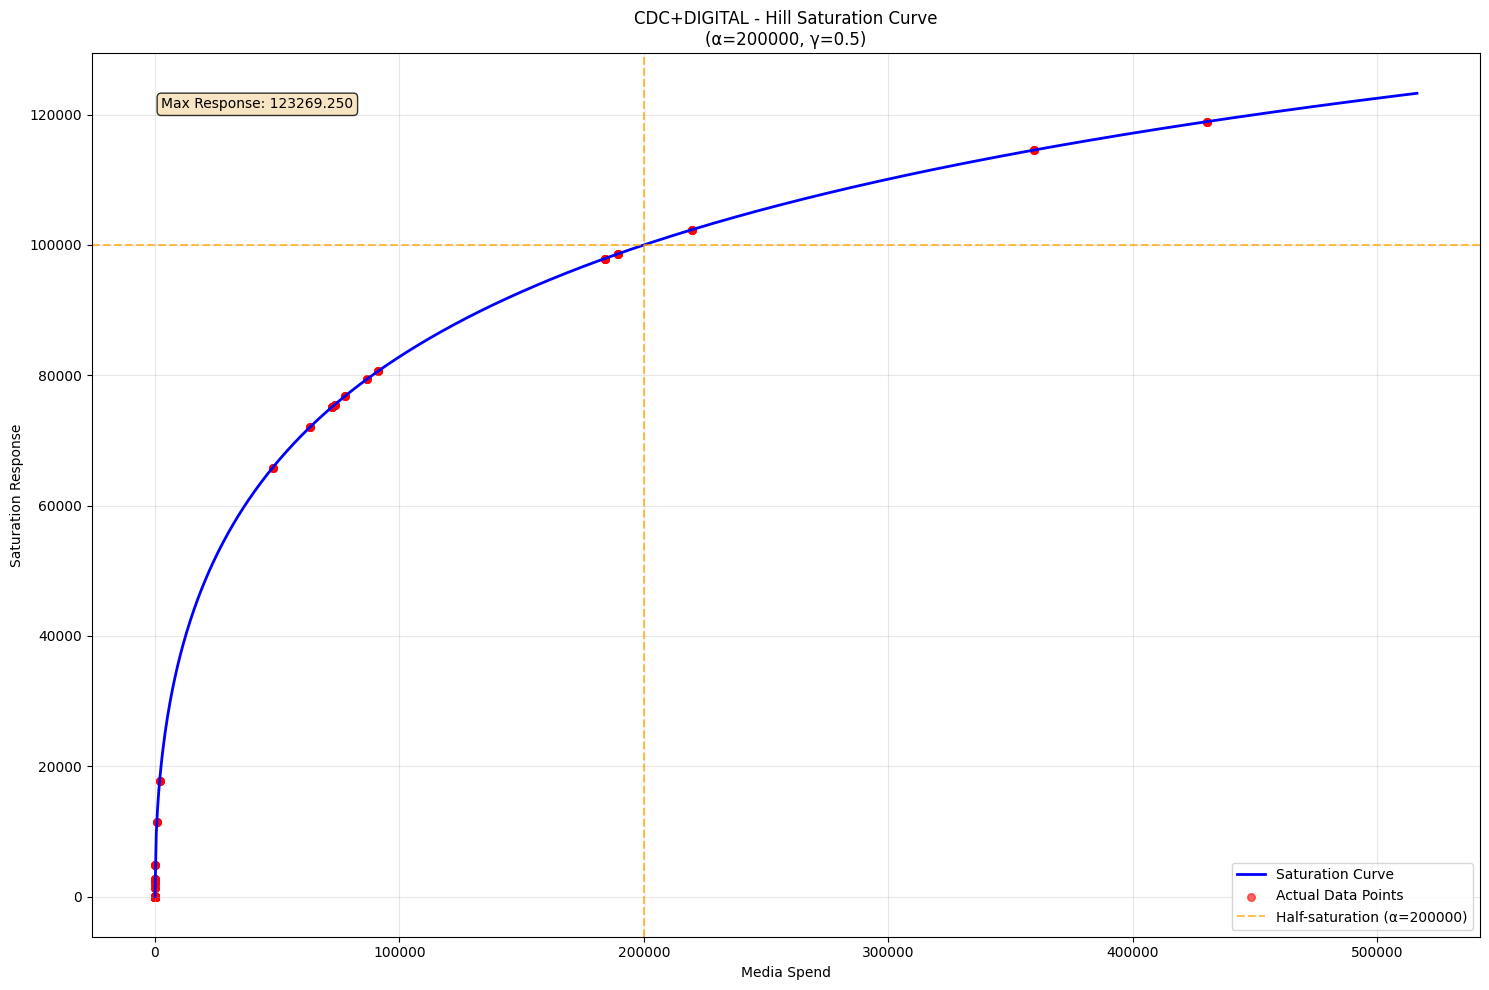

In [81]:
# 1. Basic saturation curves for all your media variables
plot_saturation_curves(input_df, media_vars[:1], alpha=200000, gamma=0.5)

In [ ]:

# # 2. Compare different parameter settings (helpful for parameter tuning)
# alpha_gamma_combinations = [
#     (50, 1.5),   # Lower saturation, gentler curve
#     (100, 2.0),  # Your current parameters  
#     (150, 2.5),  # Higher saturation, steeper curve
# ]
# plot_saturation_comparison(input_df, media_vars, alpha_gamma_combinations)

# # 3. Summary comparison of original vs transformed data
# plot_saturation_summary_stats(hill_df, input_df, media_vars)

In [82]:
def apply_z_scaling(input_df, feature_columns, target_column=None, 
                   scale_target=False, save_scaler=True, scaler_path=None):
    """
    Apply z-scaling (standardization) to features and optionally target variable.
    
    Z-scaling formula: z = (x - mean) / std
    
    Parameters:
    -----------
    input_df : pd.DataFrame
        Input dataframe with transformed media variables and controls
    feature_columns : list
        List of column names to be scaled (media + control variables)
    target_column : str, optional
        Target variable column name
    scale_target : bool, default=False
        Whether to scale the target variable (usually not recommended for MMM)
    save_scaler : bool, default=True
        Whether to save scaler objects for later inverse transformation
    scaler_path : str, optional
        Path to save scaler objects
    
    Returns:
    --------
    dict containing:
        - 'scaled_df': DataFrame with scaled features
        - 'feature_scaler': Fitted StandardScaler for features
        - 'target_scaler': Fitted StandardScaler for target (if scale_target=True)
        - 'scaling_summary': Summary statistics of scaling
    """
    
    # Create copy to avoid modifying original
    df_scaled = input_df.copy()
    
    # Validate columns exist
    missing_cols = [col for col in feature_columns if col not in input_df.columns]
    if missing_cols:
        raise ValueError(f"Feature columns not found: {missing_cols}")
    
    if target_column and target_column not in input_df.columns:
        raise ValueError(f"Target column '{target_column}' not found")
    
    # Initialize scalers
    feature_scaler = StandardScaler()
    target_scaler = None
    
    # Scale features
    print(f"Scaling {len(feature_columns)} feature columns...")
    original_features = df_scaled[feature_columns].copy()
    scaled_features = feature_scaler.fit_transform(df_scaled[feature_columns])
    df_scaled[feature_columns] = scaled_features
    
    # Scale target if requested
    if scale_target and target_column:
        print(f"Scaling target column: {target_column}")
        target_scaler = StandardScaler()
        original_target = df_scaled[[target_column]].copy()
        scaled_target = target_scaler.fit_transform(df_scaled[[target_column]])
        df_scaled[target_column] = scaled_target.flatten()
    
    # Create scaling summary
    scaling_summary = create_scaling_summary(original_features, df_scaled[feature_columns], feature_columns)
    
    # Save scalers if requested
    if save_scaler:
        if scaler_path:
            save_scalers(feature_scaler, target_scaler, scaler_path)
        else:
            print("Scalers created but not saved. Use 'save_scalers()' function if needed.")
    
    return {
        'scaled_df': df_scaled,
        'feature_scaler': feature_scaler,
        'target_scaler': target_scaler,
        'scaling_summary': scaling_summary
    }

def create_scaling_summary(original_df, scaled_df, column_names):
    """Create summary statistics comparing original vs scaled data."""
    
    summary_data = []
    
    for i, col in enumerate(column_names):
        original_col = original_df.iloc[:, i] if isinstance(original_df, np.ndarray) else original_df[col]
        scaled_col = scaled_df.iloc[:, i] if isinstance(scaled_df, np.ndarray) else scaled_df[col]
        
        summary_data.append({
            'Variable': col,
            'Original_Mean': original_col.mean(),
            'Original_Std': original_col.std(),
            'Original_Min': original_col.min(),
            'Original_Max': original_col.max(),
            'Scaled_Mean': scaled_col.mean(),
            'Scaled_Std': scaled_col.std(),
            'Scaled_Min': scaled_col.min(),
            'Scaled_Max': scaled_col.max()
        })
    
    return pd.DataFrame(summary_data)

def inverse_transform_features(scaled_df, feature_scaler, feature_columns):
    """
    Convert scaled features back to original scale.
    Useful for interpreting model results.
    """
    
    df_inverse = scaled_df.copy()
    
    # Inverse transform features
    original_features = feature_scaler.inverse_transform(scaled_df[feature_columns])
    df_inverse[feature_columns] = original_features
    
    return df_inverse

def inverse_transform_coefficients(coefficients, feature_scaler, feature_columns):
    """
    Convert model coefficients from scaled space back to original scale.
    Essential for business interpretation of MMM results.
    
    Parameters:
    -----------
    coefficients : dict or pd.Series
        Model coefficients for each feature
    feature_scaler : StandardScaler
        Fitted scaler used for features
    feature_columns : list
        List of feature column names
    
    Returns:
    --------
    dict : Coefficients in original scale
    """
    
    # Get scaling parameters
    feature_means = feature_scaler.mean_
    feature_stds = feature_scaler.scale_
    
    original_coefficients = {}
    
    for i, col in enumerate(feature_columns):
        if col in coefficients:
            # Convert coefficient: coef_original = coef_scaled / std_feature
            original_coefficients[col] = coefficients[col] / feature_stds[i]
    
    return original_coefficients

def save_scalers(feature_scaler, target_scaler, file_path):
    """Save scaler objects for later use."""
    
    scaler_dict = {
        'feature_scaler': feature_scaler,
        'target_scaler': target_scaler
    }
    
    with open(file_path, 'wb') as f:
        pickle.dump(scaler_dict, f)
    
    print(f"Scalers saved to: {file_path}")

def load_scalers(file_path):
    """Load previously saved scaler objects."""
    
    with open(file_path, 'rb') as f:
        scaler_dict = pickle.load(f)
    
    return scaler_dict['feature_scaler'], scaler_dict['target_scaler']

def validate_scaling(scaled_df, feature_columns):
    """
    Validate that scaling was applied correctly.
    Scaled features should have mean≈0 and std≈1.
    """
    
    validation_results = []
    
    for col in feature_columns:
        mean_val = scaled_df[col].mean()
        std_val = scaled_df[col].std()
        
        # Check if close to standard normal (allowing small numerical errors)
        mean_ok = abs(mean_val) < 1e-10
        std_ok = abs(std_val - 1.0) < 1e-10
        
        validation_results.append({
            'Variable': col,
            'Mean': mean_val,
            'Std': std_val,
            'Mean_OK': mean_ok,
            'Std_OK': std_ok,
            'Properly_Scaled': mean_ok and std_ok
        })
    
    validation_df = pd.DataFrame(validation_results)
    
    all_properly_scaled = validation_df['Properly_Scaled'].all()
    
    if all_properly_scaled:
        print("✅ All features properly scaled (mean≈0, std≈1)")
    else:
        print("⚠️  Some features may not be properly scaled:")
        problematic = validation_df[~validation_df['Properly_Scaled']]
        print(problematic[['Variable', 'Mean', 'Std']])
    
    return validation_df

In [83]:
hill_df

,week_date,CDC+DIGITAL,CDC+TV,EQUITY+DIGITAL,EQUITY+IN STORE,EQUITY+OOH,EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO,EQUITY+TV,PANJAVED+DIGITAL,PANJAVED+IN STORE,...,tourist_arrivals_in_million,tpr,tpr_darlie,trendline,wd,week13_si,week5_si,welfare,welfare_additional_boost,weekly_revenue
0,2017-02-03,1.000000e-22,1.000000e+02,99.999904,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
1,2017-02-10,1.000000e-22,1.000000e+02,99.999904,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
2,2017-02-17,1.000000e-22,1.000000e+02,99.999904,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
3,2017-02-24,1.000000e-22,1.000000e+02,99.999904,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e-22,...,9.195,0.118961,0.220412,-22.5,55.284163,-0.134394,-0.012927,0.0,0.0,24818075.0
4,2017-03-03,1.000000e-22,1.000000e+02,99.999987,1.000000e-22,1.000000e-22,1.000000e-22,9.999999e+01,1.000000e-22,1.000000e-22,...,9.195,0.123373,0.199166,-21.5,54.985101,-0.009762,0.242712,0.0,0.0,20678680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2020-11-27,1.000000e-22,1.000000e-22,99.999999,1.000000e-22,1.000000e-22,9.999999e+01,1.000000e+02,1.000000e+02,1.000000e-22,...,0.011,0.034785,0.005271,22.5,47.024603,-0.048573,-0.044766,0.0,0.0,22205975.0
200,2020-12-04,1.000000e-22,1.000000e-22,99.999994,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e+02,1.000000e+02,1.000000e-22,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0
201,2020-12-11,1.000000e-22,1.000000e-22,99.999994,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e+02,1.000000e+02,1.000000e-22,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0
202,2020-12-18,1.000000e-22,1.000000e-22,99.999994,1.000000e-22,1.000000e-22,1.000000e-22,1.000000e+02,1.000000e+02,1.000000e-22,...,0.011,0.053483,0.003892,23.5,46.919883,-0.084328,-0.128167,0.0,0.0,22505400.0


In [84]:
all_features = media_vars + control_vars

# Apply z-scaling
scaling_result = apply_z_scaling(
    input_df=hill_df,  # Your Hill-transformed dataframe
    feature_columns=all_features,
    target_column='weekly_revenue',
    scale_target=False,  # Don't scale target for MMM
    save_scaler=True
)

Scaling 55 feature columns...
Scalers created but not saved. Use 'save_scalers()' function if needed.


In [85]:
final_df  = scaling_result['scaled_df']

In [86]:
final_df

,week_date,CDC+DIGITAL,CDC+TV,EQUITY+DIGITAL,EQUITY+IN STORE,EQUITY+OOH,EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO,EQUITY+TV,PANJAVED+DIGITAL,PANJAVED+IN STORE,...,tourist_arrivals_in_million,tpr,tpr_darlie,trendline,wd,week13_si,week5_si,welfare,welfare_additional_boost,weekly_revenue
0,2017-02-03,-0.690798,0.415227,0.446312,-0.214834,-0.311086,-0.301511,-0.961524,-1.187911,-0.25,...,0.455788,-0.462406,1.574635,-1.697806,0.516716,-1.624650,-0.175778,-1.325427,-0.158511,24818075.0
1,2017-02-10,-0.690798,0.415227,0.446312,-0.214834,-0.311086,-0.301511,-0.961524,-1.187911,-0.25,...,0.455788,-0.462406,1.574635,-1.697806,0.516716,-1.624650,-0.175778,-1.325427,-0.158511,24818075.0
2,2017-02-17,-0.690798,0.415227,0.446312,-0.214834,-0.311086,-0.301511,-0.961524,-1.187911,-0.25,...,0.455788,-0.462406,1.574635,-1.697806,0.516716,-1.624650,-0.175778,-1.325427,-0.158511,24818075.0
3,2017-02-24,-0.690798,0.415227,0.446312,-0.214834,-0.311086,-0.301511,-0.961524,-1.187911,-0.25,...,0.455788,-0.462406,1.574635,-1.697806,0.516716,-1.624650,-0.175778,-1.325427,-0.158511,24818075.0
4,2017-03-03,-0.690798,0.415227,0.491242,-0.214834,-0.311086,-0.301511,1.040017,-1.187911,-0.25,...,0.455788,-0.387320,1.092901,-1.623926,0.350234,-0.186396,1.546158,-1.325427,-0.158511,20678680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2020-11-27,-0.690798,-2.408319,0.497638,-0.214834,-0.311086,3.316627,1.040017,0.866770,-0.25,...,-1.988393,-1.894875,-3.303409,1.626823,-4.081229,-0.634275,-0.390239,-1.325427,-0.158511,22205975.0
200,2020-12-04,-0.690798,-2.408319,0.494696,-0.214834,-0.311086,-0.301511,1.040017,0.866770,-0.25,...,-1.988393,-1.576677,-3.334678,1.700704,-4.139525,-1.046894,-0.952017,-1.325427,-0.158511,22505400.0
201,2020-12-11,-0.690798,-2.408319,0.494696,-0.214834,-0.311086,-0.301511,1.040017,0.866770,-0.25,...,-1.988393,-1.576677,-3.334678,1.700704,-4.139525,-1.046894,-0.952017,-1.325427,-0.158511,22505400.0
202,2020-12-18,-0.690798,-2.408319,0.494696,-0.214834,-0.311086,-0.301511,1.040017,0.866770,-0.25,...,-1.988393,-1.576677,-3.334678,1.700704,-4.139525,-1.046894,-0.952017,-1.325427,-0.158511,22505400.0


In [87]:
final_df.columns

Index(['week_date', 'CDC+DIGITAL', 'CDC+TV', 'EQUITY+DIGITAL',
       'EQUITY+IN STORE', 'EQUITY+OOH',
       'EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO', 'EQUITY+TV',
       'PANJAVED+DIGITAL', 'PANJAVED+IN STORE', 'PANJAVED+OOH', 'PANJAVED+TV',
       'SALT+DIGITAL', 'SALT+IN STORE',
       'SALT+OTHERADVERTISING_NEWSPAPER_RADIO', 'SALT+TV', 'TOTAL+DIGITAL',
       'TOTAL+IN STORE', 'TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO', 'TOTAL+TV',
       'aided_awareness', 'bigpack', 'buyget', 'chim_shop_chai',
       'closeness_top_3_box', 'consumer_confidence_index',
       'darlie_cdc_basepriceratio', 'darlie_discount', 'extravol',
       'extravol_darlie', 'free_promo', 'free_promo_darlie',
       'free_with_others', 'free_with_others_darlie', 'freepremium', 'loyalty',
       'nd', 'near_pack', 'panic_pantry_loading', 'pmd', 'rl',
       'target_baseprice', 'target_discount', 'target_price', 'theme',
       'top_of_mind_brand_awareness', 'total_unaided_brand_awareness',
       'tourist_arrival

In [89]:
!pip install pymc

  Using cached arviz-0.22.0-py3-none-any.whl.metadata (8.9 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached logical-unification-0.4.6.tar.gz (31 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached minikanren-1.0.5-py3-none-any.whl.metadata (7.6 kB)
  Using cached cons-0.4.7-py3-none-any.whl.metadata (3.8 kB)
  Using cached xarray_einstats-0.9.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached toolz-1.0.0-py3-none-any.whl.metadata (5.1 kB)
  Using cached multipledispatch-1.0.0-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/535.5 kB ? eta -:--:--
   ---------------------------------------  524.3/535.5 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 535.5/535.5 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -----------

  DEPRECATION: Building 'logical-unification' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'logical-unification'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [90]:

import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


In [91]:

# Load your data
df = final_df.copy()


In [92]:

# ============================================================================
# 1. DEFINE VARIABLE GROUPS
# ============================================================================

# Media channels (already transformed with adstock)
media_channels = [
    'CDC+DIGITAL', 'CDC+TV', 'EQUITY+DIGITAL', 'EQUITY+IN STORE', 
    'EQUITY+OOH', 'EQUITY+OTHERADVERTISING_NEWSPAPER_RADIO', 'EQUITY+TV',
    'PANJAVED+DIGITAL', 'PANJAVED+IN STORE', 'PANJAVED+OOH', 'PANJAVED+TV',
    'SALT+DIGITAL', 'SALT+IN STORE', 'SALT+OTHERADVERTISING_NEWSPAPER_RADIO', 
    'SALT+TV', 'TOTAL+DIGITAL', 'TOTAL+IN STORE', 
    'TOTAL+OTHERADVERTISING_NEWSPAPER_RADIO', 'TOTAL+TV'
]

# Control variables
control_vars = [
    'aided_awareness', 'bigpack', 'buyget', 'chim_shop_chai',
    'closeness_top_3_box', 'consumer_confidence_index',
    'darlie_cdc_basepriceratio', 'darlie_discount', 'extravol',
    'extravol_darlie', 'free_promo', 'free_promo_darlie',
    'free_with_others', 'free_with_others_darlie', 'freepremium', 'loyalty',
    'nd', 'near_pack', 'panic_pantry_loading', 'pmd', 'rl',
    'target_baseprice', 'target_discount', 'target_price', 'theme',
    'top_of_mind_brand_awareness', 'total_unaided_brand_awareness',
    'tourist_arrivals_in_million', 'tpr', 'tpr_darlie', 'trendline', 'wd',
    'week13_si', 'week5_si', 'welfare', 'welfare_additional_boost'
]

# Target variable
target = 'weekly_revenue'

# ============================================================================
# 2. PREPARE DATA FOR MODELING
# ============================================================================

# Extract arrays
y = df[target].values
X_media = df[media_channels].values
X_control = df[control_vars].values

n_obs = len(y)
n_media = len(media_channels)
n_control = len(control_vars)

print(f"Observations: {n_obs}")
print(f"Media channels: {n_media}")
print(f"Control variables: {n_control}")


Observations: 204
Media channels: 19
Control variables: 36


In [95]:

# ============================================================================
# 3. BUILD BAYESIAN MMM MODEL
# ============================================================================

with pm.Model() as mmm_model:
    
    # -----------------------------------
    # PRIORS
    # -----------------------------------
    
    # Intercept
    intercept = pm.Normal('intercept', mu=y.mean(), sigma=y.std())
    
    # Media coefficients - positive effect expected
    # Using HalfNormal to enforce positive contribution
    beta_media = pm.HalfNormal('beta_media', sigma=1, shape=n_media)
    
    # Control variable coefficients - can be positive or negative
    beta_control = pm.Normal('beta_control', mu=0, sigma=1, shape=n_control)
    
    # Noise/error term
    sigma = pm.HalfNormal('sigma', sigma=y.std())
    
    # -----------------------------------
    # LIKELIHOOD
    # -----------------------------------
    
    # Linear combination
    mu = (intercept + 
          pm.math.dot(X_media, beta_media) + 
          pm.math.dot(X_control, beta_control))
    
    # Likelihood
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y)
    
    # -----------------------------------
    # SAMPLING
    # -----------------------------------
    
    # Sample from posterior
    trace = pm.sample(
        draws=1000,           # Number of samples per chain
        tune=1000,            # Burn-in samples
        chains=2,             # Number of chains
        target_accept=0.95,   # Higher for better convergence
        return_inferencedata=True,
        random_seed=42
    )
    
    # Prior predictive check
    prior_pred = pm.sample_prior_predictive(samples=500, random_seed=42)
    
    # Posterior predictive check
    post_pred = pm.sample_posterior_predictive(trace, random_seed=42)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [intercept, beta_media, beta_control, sigma]


Output()

ValueError: Not enough samples to build a trace.

In [ ]:

# ============================================================================
# 4. MODEL DIAGNOSTICS
# ============================================================================

# Summary statistics
print("\n" + "="*80)
print("MODEL SUMMARY")
print("="*80)
summary = az.summary(trace, var_names=['intercept', 'beta_media', 'beta_control', 'sigma'])
print(summary)

# Convergence diagnostics
print("\n" + "="*80)
print("CONVERGENCE DIAGNOSTICS")
print("="*80)

# R-hat (should be < 1.01)
rhat = az.rhat(trace)
print(f"\nR-hat statistics:")
print(f"Max R-hat: {rhat.max().values:.4f}")
print(f"Variables with R-hat > 1.01: {(rhat > 1.01).sum().values}")

# Effective sample size
ess = az.ess(trace)
print(f"\nEffective Sample Size:")
print(f"Min ESS: {ess.min().values:.0f}")

# ============================================================================
# 5. VISUALIZATION
# ============================================================================

# Trace plots for key parameters
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
az.plot_trace(trace, var_names=['intercept', 'sigma'], axes=axes[:2])
plt.tight_layout()
plt.savefig('trace_plots_base.png', dpi=300, bbox_inches='tight')
plt.show()

# Media coefficient trace plots
fig = plt.figure(figsize=(20, 12))
az.plot_trace(trace, var_names=['beta_media'], compact=False)
plt.tight_layout()
plt.savefig('trace_plots_media.png', dpi=300, bbox_inches='tight')
plt.show()

# Posterior distributions of media coefficients
fig, ax = plt.subplots(figsize=(14, 8))
az.plot_forest(
    trace, 
    var_names=['beta_media'],
    combined=True,
    figsize=(14, 8)
)
ax.set_yticklabels(media_channels)
plt.title('Media Channel Coefficients (95% HDI)', fontsize=14, fontweight='bold')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.savefig('media_coefficients_forest.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 6. MODEL PERFORMANCE
# ============================================================================

# Posterior predictive check
y_pred_mean = post_pred.posterior_predictive['y_obs'].mean(dim=['chain', 'draw']).values

# Calculate metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y, y_pred_mean)
mae = mean_absolute_error(y, y_pred_mean)
rmse = np.sqrt(mean_squared_error(y, y_pred_mean))
mape = np.mean(np.abs((y - y_pred_mean) / y)) * 100

print("\n" + "="*80)
print("MODEL PERFORMANCE")
print("="*80)
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Actual vs Predicted plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y, y_pred_mean, alpha=0.6)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
ax.set_xlabel('Actual Revenue', fontsize=12)
ax.set_ylabel('Predicted Revenue', fontsize=12)
ax.set_title(f'Actual vs Predicted (R² = {r2:.4f})', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 7. MEDIA CONTRIBUTION ANALYSIS
# ============================================================================

# Extract posterior samples for media coefficients
beta_media_samples = trace.posterior['beta_media'].values.reshape(-1, n_media)

# Calculate contribution (coefficient * mean of standardized variable)
contributions = []
for i, channel in enumerate(media_channels):
    contrib = beta_media_samples[:, i].mean() * X_media[:, i].mean()
    contributions.append(contrib)

contribution_df = pd.DataFrame({
    'Channel': media_channels,
    'Contribution': contributions,
    'Contribution_pct': 100 * np.array(contributions) / np.sum(contributions)
}).sort_values('Contribution', ascending=False)

print("\n" + "="*80)
print("MEDIA CONTRIBUTION TO REVENUE")
print("="*80)
print(contribution_df)

# Contribution plot
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(contribution_df['Channel'], contribution_df['Contribution'])
ax.set_xlabel('Contribution to Revenue', fontsize=12)
ax.set_title('Media Channel Contributions', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('media_contributions.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 8. ROI & ROAS ANALYSIS (CDC CHANNELS ONLY)
# ============================================================================

print("\n" + "="*80)
print("ROI & ROAS CALCULATION - CDC CHANNELS")
print("="*80)

# Filter only CDC channels
cdc_channels = [ch for ch in media_channels if ch.startswith('CDC+')]
print(f"\nAnalyzing {len(cdc_channels)} CDC channels: {cdc_channels}")

# You need to provide the actual spend data for CDC channels
# This should be the ORIGINAL spend before any transformation
# Load your spend data
spend_data = pd.read_csv('your_media_spend_data.csv')  # Should have columns matching CDC channels

# Calculate total revenue contribution for each channel
# Using posterior mean of coefficients
beta_media_mean = trace.posterior['beta_media'].mean(dim=['chain', 'draw']).values

# Total contribution = coefficient * sum of all transformed media values
total_contributions = {}
for i, channel in enumerate(media_channels):
    if channel in cdc_channels:
        # Sum of revenue generated across all weeks
        total_revenue_generated = (beta_media_mean[i] * X_media[:, i]).sum()
        total_contributions[channel] = total_revenue_generated

# Calculate ROI and ROAS for CDC channels only
roi_results = []

for channel in cdc_channels:
    # Get actual spend for this channel (you need to provide this)
    # Assuming spend_data has columns matching CDC channels
    if channel in spend_data.columns:
        total_spend = spend_data[channel].sum()
        
        if total_spend > 0:
            revenue_generated = total_contributions[channel]
            
            # ROAS = Revenue / Spend
            roas = revenue_generated / total_spend
            
            # ROI = (Revenue - Spend) / Spend = ROAS - 1
            roi = (revenue_generated - total_spend) / total_spend
            roi_pct = roi * 100
            
            roi_results.append({
                'Channel': channel,
                'Total_Spend': total_spend,
                'Revenue_Generated': revenue_generated,
                'ROAS': roas,
                'ROI': roi,
                'ROI_Percent': roi_pct,
                'Profit': revenue_generated - total_spend
            })

roi_df = pd.DataFrame(roi_results).sort_values('ROAS', ascending=False)

print("\nROI & ROAS for CDC Channels:")
print(roi_df.to_string(index=False))

# Calculate aggregate CDC metrics
if len(roi_df) > 0:
    total_cdc_spend = roi_df['Total_Spend'].sum()
    total_cdc_revenue = roi_df['Revenue_Generated'].sum()
    total_cdc_profit = roi_df['Profit'].sum()
    
    aggregate_roas = total_cdc_revenue / total_cdc_spend if total_cdc_spend > 0 else 0
    aggregate_roi = (total_cdc_revenue - total_cdc_spend) / total_cdc_spend * 100 if total_cdc_spend > 0 else 0
    
    print("\n" + "="*80)
    print("AGGREGATE CDC BRAND METRICS")
    print("="*80)
    print(f"Total CDC Spend: ${total_cdc_spend:,.2f}")
    print(f"Total CDC Revenue Generated: ${total_cdc_revenue:,.2f}")
    print(f"Total CDC Profit: ${total_cdc_profit:,.2f}")
    print(f"Aggregate CDC ROAS: {aggregate_roas:.2f}")
    print(f"Aggregate CDC ROI: {aggregate_roi:.2f}%")

# ============================================================================
# 9. CREDIBLE INTERVALS FOR ROI (CDC CHANNELS)
# ============================================================================

print("\n" + "="*80)
print("ROI UNCERTAINTY FOR CDC CHANNELS (95% Credible Intervals)")
print("="*80)

# Calculate ROI distribution for CDC channels using posterior samples
roi_distributions = {}

for i, channel in enumerate(media_channels):
    if channel in cdc_channels and channel in spend_data.columns:
        total_spend = spend_data[channel].sum()
        
        if total_spend > 0:
            # Get all posterior samples for this coefficient
            beta_samples = beta_media_samples[:, i]
            
            # Calculate revenue for each sample
            revenue_samples = (beta_samples[:, np.newaxis] * X_media[:, i]).sum(axis=1)
            
            # Calculate ROI for each sample
            roi_samples = (revenue_samples - total_spend) / total_spend * 100
            
            # Store distribution
            roi_distributions[channel] = roi_samples
            
            # Calculate credible intervals
            roi_mean = roi_samples.mean()
            roi_median = np.median(roi_samples)
            roi_ci_lower = np.percentile(roi_samples, 2.5)
            roi_ci_upper = np.percentile(roi_samples, 97.5)
            
            print(f"\n{channel}:")
            print(f"  Mean ROI: {roi_mean:.2f}%")
            print(f"  Median ROI: {roi_median:.2f}%")
            print(f"  95% CI: [{roi_ci_lower:.2f}%, {roi_ci_upper:.2f}%]")
            print(f"  Probability ROI > 0%: {(roi_samples > 0).mean():.2%}")
            print(f"  Probability ROI > 50%: {(roi_samples > 50).mean():.2%}")
            print(f"  Probability ROI > 100%: {(roi_samples > 100).mean():.2%}")

# ============================================================================
# 10. ROI VISUALIZATIONS (CDC CHANNELS)
# ============================================================================

# ROAS Bar Chart for CDC
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['green' if x >= 1 else 'red' for x in roi_df['ROAS']]
ax.barh(roi_df['Channel'], roi_df['ROAS'], color=colors, alpha=0.7)
ax.axvline(x=1, color='black', linestyle='--', linewidth=2, label='Break-even (ROAS=1)')
ax.set_xlabel('Return on Ad Spend (ROAS)', fontsize=12)
ax.set_title('CDC Channels - ROAS', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('cdc_roas_by_channel.png', dpi=300, bbox_inches='tight')
plt.show()

# ROI Percentage Bar Chart for CDC
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['green' if x >= 0 else 'red' for x in roi_df['ROI_Percent']]
ax.barh(roi_df['Channel'], roi_df['ROI_Percent'], color=colors, alpha=0.7)
ax.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Break-even (ROI=0%)')
ax.set_xlabel('Return on Investment (%)', fontsize=12)
ax.set_title('CDC Channels - ROI', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('cdc_roi_by_channel.png', dpi=300, bbox_inches='tight')
plt.show()

# ROI Distribution Plot (violin plot) for CDC
if roi_distributions:
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Prepare data for violin plot
    roi_data = []
    roi_labels = []
    for channel, roi_samples in sorted(roi_distributions.items(), 
                                       key=lambda x: np.median(x[1]), 
                                       reverse=True):
        roi_data.append(roi_samples)
        roi_labels.append(channel.replace('CDC+', ''))  # Shorten labels
    
    parts = ax.violinplot(roi_data, vert=False, showmeans=True, showmedians=True)
    ax.set_yticks(range(1, len(roi_labels) + 1))
    ax.set_yticklabels(roi_labels)
    ax.axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Break-even')
    ax.set_xlabel('ROI Distribution (%)', fontsize=12)
    ax.set_title('CDC Channels - ROI Uncertainty', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig('cdc_roi_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

# Spend vs Revenue Scatter for CDC
if len(roi_df) > 0:
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(roi_df['Total_Spend'], roi_df['Revenue_Generated'], 
                         s=300, c=roi_df['ROAS'], cmap='RdYlGn', 
                         alpha=0.7, edgecolors='black', linewidth=2)
    
    # Add diagonal line (break-even line where revenue = spend)
    max_val = max(roi_df['Total_Spend'].max(), roi_df['Revenue_Generated'].max())
    ax.plot([0, max_val], [0, max_val], 'k--', linewidth=2, label='Break-even (ROAS=1)')
    
    # Add labels for each point
    for idx, row in roi_df.iterrows():
        channel_label = row['Channel'].replace('CDC+', '')
        ax.annotate(channel_label, 
                    (row['Total_Spend'], row['Revenue_Generated']),
                    fontsize=10, fontweight='bold', 
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
    
    ax.set_xlabel('Total Spend ($)', fontsize=12)
    ax.set_ylabel('Revenue Generated ($)', fontsize=12)
    ax.set_title('CDC Channels - Spend vs Revenue Generated', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('ROAS', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('cdc_spend_vs_revenue.png', dpi=300, bbox_inches='tight')
    plt.show()

# Profit Comparison for CDC
if len(roi_df) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    colors = ['green' if x >= 0 else 'red' for x in roi_df['Profit']]
    bars = ax.barh(roi_df['Channel'], roi_df['Profit'], color=colors, alpha=0.7)
    ax.axvline(x=0, color='black', linestyle='--', linewidth=2)
    ax.set_xlabel('Profit ($)', fontsize=12)
    ax.set_title('CDC Channels - Profit/Loss', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, (bar, profit) in enumerate(zip(bars, roi_df['Profit'])):
        width = bar.get_width()
        label_x = width + (max(roi_df['Profit']) * 0.01 if width >= 0 else width - max(roi_df['Profit']) * 0.01)
        ax.text(label_x, bar.get_y() + bar.get_height()/2, 
                f'${profit:,.0f}', 
                ha='left' if width >= 0 else 'right', 
                va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('cdc_profit_by_channel.png', dpi=300, bbox_inches='tight')
    plt.show()

# ============================================================================
# 11. EFFICIENCY METRICS (CDC CHANNELS)
# ============================================================================

print("\n" + "="*80)
print("EFFICIENCY METRICS - CDC CHANNELS")
print("="*80)

# Cost per incremental revenue unit
roi_df['Cost_per_Revenue_Unit'] = roi_df['Total_Spend'] / roi_df['Revenue_Generated']

# Efficiency score (revenue per dollar spent)
roi_df['Efficiency_Score'] = roi_df['Revenue_Generated'] / roi_df['Total_Spend']

print("\nEfficiency Rankings for CDC Channels:")
print(roi_df[['Channel', 'Efficiency_Score', 'Cost_per_Revenue_Unit']].to_string(index=False))

# Best and worst performing CDC channels
if len(roi_df) > 0:
    best_channel = roi_df.iloc[0]
    worst_channel = roi_df.iloc[-1]
    
    print("\n" + "-"*80)
    print("BEST PERFORMING CDC CHANNEL:")
    print(f"  Channel: {best_channel['Channel']}")
    print(f"  ROAS: {best_channel['ROAS']:.2f}")
    print(f"  ROI: {best_channel['ROI_Percent']:.2f}%")
    print(f"  Efficiency Score: {best_channel['Efficiency_Score']:.2f}")
    
    print("\nWORST PERFORMING CDC CHANNEL:")
    print(f"  Channel: {worst_channel['Channel']}")
    print(f"  ROAS: {worst_channel['ROAS']:.2f}")
    print(f"  ROI: {worst_channel['ROI_Percent']:.2f}%")
    print(f"  Efficiency Score: {worst_channel['Efficiency_Score']:.2f}")

# ============================================================================
# 12. WEEKLY ROI TIME SERIES (CDC CHANNELS)
# ============================================================================

print("\n" + "="*80)
print("CALCULATING WEEKLY ROI TRENDS - CDC CHANNELS")
print("="*80)

# Calculate weekly contributions for CDC channels
weekly_roi_data = []

for i, channel in enumerate(media_channels):
    if channel in cdc_channels and channel in spend_data.columns:
        # Weekly revenue contribution
        weekly_revenue = beta_media_mean[i] * X_media[:, i]
        
        # Weekly spend
        weekly_spend = spend_data[channel].values
        
        # Weekly ROAS
        weekly_roas = np.divide(weekly_revenue, weekly_spend, 
                                out=np.zeros_like(weekly_revenue), 
                                where=weekly_spend!=0)
        
        # Weekly ROI
        weekly_roi = np.divide((weekly_revenue - weekly_spend), weekly_spend, 
                               out=np.zeros_like(weekly_revenue), 
                               where=weekly_spend!=0) * 100
        
        weekly_roi_data.append({
            'Channel': channel,
            'Weekly_ROAS_Mean': weekly_roas.mean(),
            'Weekly_ROAS_Median': np.median(weekly_roas),
            'Weekly_ROAS_Std': weekly_roas.std(),
            'Weekly_ROI_Mean': weekly_roi.mean(),
            'Weeks_Profitable': (weekly_roas > 1).sum(),
            'Total_Weeks': len(weekly_roas),
            'Profitability_Rate': (weekly_roas > 1).sum() / len(weekly_roas) * 100
        })

weekly_roi_df = pd.DataFrame(weekly_roi_data).sort_values('Weekly_ROAS_Mean', ascending=False)
print("\nWeekly ROI Statistics for CDC Channels:")
print(weekly_roi_df.to_string(index=False))

# Plot weekly ROAS trends for CDC channels
if len(cdc_channels) > 0:
    fig, axes = plt.subplots(len(cdc_channels), 1, figsize=(14, 4*len(cdc_channels)))
    if len(cdc_channels) == 1:
        axes = [axes]
    
    for idx, (i, channel) in enumerate([(i, ch) for i, ch in enumerate(media_channels) if ch in cdc_channels]):
        if channel in spend_data.columns:
            weekly_revenue = beta_media_mean[i] * X_media[:, i]
            weekly_spend = spend_data[channel].values
            weekly_roas = np.divide(weekly_revenue, weekly_spend, 
                                    out=np.zeros_like(weekly_revenue), 
                                    where=weekly_spend!=0)
            
            axes[idx].plot(df['week_date'], weekly_roas, linewidth=2, color='steelblue')
            axes[idx].axhline(y=1, color='red', linestyle='--', linewidth=2, label='Break-even')
            axes[idx].fill_between(df['week_date'], weekly_roas, 1, 
                                   where=(weekly_roas >= 1), alpha=0.3, color='green', 
                                   label='Profitable')
            axes[idx].fill_between(df['week_date'], weekly_roas, 1, 
                                   where=(weekly_roas < 1), alpha=0.3, color='red',
                                   label='Unprofitable')
            axes[idx].set_title(f'{channel.replace("CDC+", "")} - Weekly ROAS Over Time', 
                               fontsize=12, fontweight='bold')
            axes[idx].set_ylabel('ROAS', fontsize=10)
            axes[idx].legend(loc='best')
            axes[idx].grid(True, alpha=0.3)
            axes[idx].tick_params(axis='x', rotation=45)
    
    axes[-1].set_xlabel('Week Date', fontsize=10)
    plt.tight_layout()
    plt.savefig('cdc_weekly_roas_trends.png', dpi=300, bbox_inches='tight')
    plt.show()

# ============================================================================
# 13. SAVE ROI RESULTS
# ============================================================================

# Save ROI results
roi_df.to_csv('roi_analysis.csv', index=False)
weekly_roi_df.to_csv('weekly_roi_stats.csv', index=False)

# Save ROI distributions
roi_dist_df = pd.DataFrame(roi_distributions)
roi_dist_df.to_csv('roi_distributions.csv', index=False)

print("\n" + "="*80)
print("MODELING COMPLETE!")
print("="*80)
print("Saved files:")
print("- mmm_trace.nc (posterior samples)")
print("- mmm_summary.csv (coefficient summaries)")
print("- media_contributions.csv (channel contributions)")
print("- roi_analysis.csv (ROI & ROAS by channel)")
print("- weekly_roi_stats.csv (weekly ROI statistics)")
print("- roi_distributions.csv (ROI posterior distributions)")
print("- Various PNG plots including ROI visualizations")

In [ ]:
# What is SLSQP?
# SLSQP = Sequential Least Squares Quadratic Programming
# Think of it as a smart hill climber that finds the best budget allocation to maximize your revenue.
# Simple Analogy:
# Imagine you're on a foggy mountain (your revenue landscape) and want to reach the highest peak (maximum revenue). SLSQP is like having a smart guide who:

# Feels the slope under your feet (calculates gradients)
# Takes smart steps toward steeper areas (quadratic approximation)
# Respects boundaries (doesn't let you fall off cliffs = constraints)
# Learns from each step (sequential updates)

# Concrete MMM Example:
# Let's say you have 3 channels and $100k budget:
# Your MMM Model Says:

# TV: Saturates quickly, high impact initially
# Digital: Linear response, consistent ROI
# Radio: Low saturation, steady performance

# Revenue Function (simplified):
# Revenue = 1000 + 5×TV_transformed + 3×Digital_transformed + 2×Radio_transformed
# Step-by-Step SLSQP Process:
# STEP 1: Start with Initial Guess
# Initial allocation: TV=$33k, Digital=$33k, Radio=$33k
# Initial revenue: $1,000 + 5×(30) + 3×(25) + 2×(20) = $1,265k
# STEP 2: Calculate Gradients (Slopes)

# SLSQP asks: "If I move $1k from Radio to TV, how much more revenue?"
# TV gradient: +4.2 (moving $1k TO TV increases revenue by $4.2k)
# Digital gradient: +2.8
# Radio gradient: +1.9

# STEP 3: Build Quadratic Approximation
# Instead of trying every possible combination, SLSQP builds a mathematical "model of the model":
# Revenue ≈ Current_Revenue + gradients×changes + ½×(curvature×changes²)
# This approximation captures:

# Linear effects: How revenue changes with small moves
# Curvature effects: How saturation affects bigger moves

# STEP 4: Solve the Approximation
# SLSQP solves: "Within this approximation, what allocation maximizes revenue?"
# New allocation: TV=$45k, Digital=$35k, Radio=$20k
# Predicted revenue: $1,280k
# STEP 5: Take the Step
# Move to the new allocation and check actual revenue.
# STEP 6: Repeat Until Convergence
# Keep building better approximations until no improvement is possible.
# Why "Sequential"?
# Each iteration, SLSQP:

# Builds a quadratic approximation around current point
# Solves that simpler problem optimally
# Takes a step toward that solution
# Repeats with better information

# It's like having GPS that recalculates your route as you drive!
# How it Handles Constraints:
# Budget Constraint: TV + Digital + Radio = $100k
# SLSQP treats this like a fence - it can walk along the fence but never cross it.
# Mathematically:
# If move breaks budget → Project back onto constraint
# If move satisfies budget → Take full step
# Channel Limits: Each channel between $5k-$60k
# SLSQP treats these like walls - it bounces off walls but keeps optimizing.
# Real Example - Iteration by Iteration:
# ITERATION 1:
# Current: TV=$33k, Digital=$33k, Radio=$33k → Revenue=$1,265k
# Gradients: TV=+4.2, Digital=+2.8, Radio=+1.9
# Decision: "TV has highest gradient, move money there"
# New: TV=$40k, Digital=$32k, Radio=$28k → Revenue=$1,275k

# ITERATION 2:
# Current: TV=$40k, Digital=$32k, Radio=$28k → Revenue=$1,275k
# Gradients: TV=+3.1 (lower due to saturation), Digital=+2.9, Radio=+2.0
# Decision: "Digital now competitive, balance more"
# New: TV=$42k, Digital=$36k, Radio=$22k → Revenue=$1,285k

# ITERATION 3:
# Current: TV=$42k, Digital=$36k, Radio=$22k → Revenue=$1,285k
# Gradients: TV=+2.9, Digital=+3.0, Radio=+2.1
# Decision: "Digital slightly higher, small adjustment"
# New: TV=$41k, Digital=$37k, Radio=$22k → Revenue=$1,286k

# ITERATION 4:
# Gradients: TV=+2.95, Digital=+2.94, Radio=+2.1
# Decision: "Marginal improvements tiny, CONVERGED!"
# Final: TV=$41k, Digital=$37k, Radio=$22k
# Why SLSQP Works So Well for MMM:

# Handles Saturation Curves: The quadratic approximation captures diminishing returns perfectly
# Respects Budget: Never violates your spending constraints
# Fast Convergence: Usually finds optimum in 10-50 iterations
# Robust: Works even when your revenue function is complex

# The "Least Squares" Part:
# When SLSQP builds its quadratic approximation, it uses least squares fitting to find the best quadratic function that matches your revenue landscape locally. It's like fitting a smooth hill around your current position.
# Bottom Line:
# SLSQP is like having a mathematically perfect marketer who:

# Understands diminishing returns
# Respects budget constraints
# Always moves money to where it does the most good
# Learns and adapts with each step
# Stops when perfection is reached

# That's why it's the gold standard for MMM optimization! 🎯